#### The dataset gathered for this IPL match analysis includes the following columns:


#### team: The team currently batting.
#### over: The over number within the match.
#### batter: The batsman facing the current delivery.
#### bowler: The bowler delivering the ball.
#### non_striker: The batsman positioned at the non-striker’s end.
#### runs_batter: Runs scored by the batsman on the delivery.
#### runs_extras: Additional runs conceded, such as wides or no-balls.
#### runs_total: Total runs scored on the delivery, including extras.
#### player_out: Name of the dismissed player, if a wicket fell on the delivery.
#### wicket_kind: The mode of dismissal, if applicable (e.g., caught, bowled, run-out).
#### fielders: Names of the fielders involved in the dismissal, if any.

In [1]:
import pandas as pd
deliveries_df = pd.read_csv("innings_deliveries.csv")

print(deliveries_df.head())

                          team  over        batter    bowler   non_striker  \
0  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
1  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
2  Royal Challengers Bengaluru     0  F du Plessis  I Sharma       V Kohli   
3  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
4  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   

   runs_batter  runs_extras  runs_total player_out wicket_kind fielders  
0            0            0           0        NaN         NaN       []  
1            1            0           1        NaN         NaN       []  
2            1            0           1        NaN         NaN       []  
3            0            0           0        NaN         NaN       []  
4            2            0           2        NaN         NaN       []  


The dataset contains some null values; however, there's no need to drop rows or fill these null values, as doing so could compromise the integrity of the data. 
Now, Visualizing the run distribution per over for both teams to highlight the scoring patterns throughout the innings.

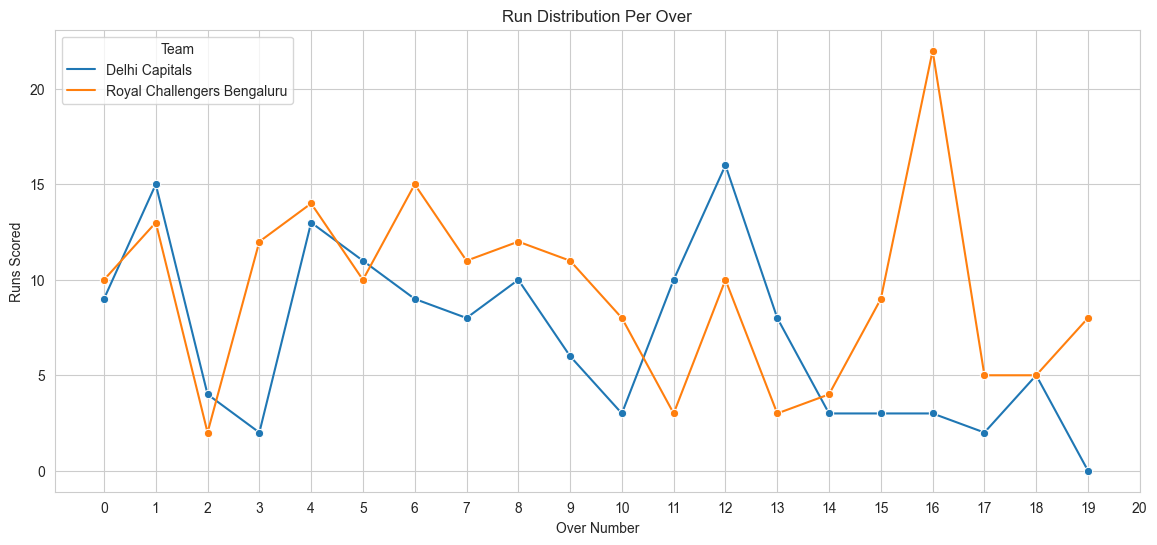

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()

The plot above shows the run distribution per over for both teams. Here are some insights:

The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.
Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.
Next, I’ll analyze the top scorers from each team to highlight individual performances. Let’s create a bar chart to visualize the top contributors in terms of runs:

Next, I'll focus on analyzing the top scorers from each team to showcase standout individual performances. To illustrate this, let’s create a bar chart highlighting the leading contributors based on runs scored.

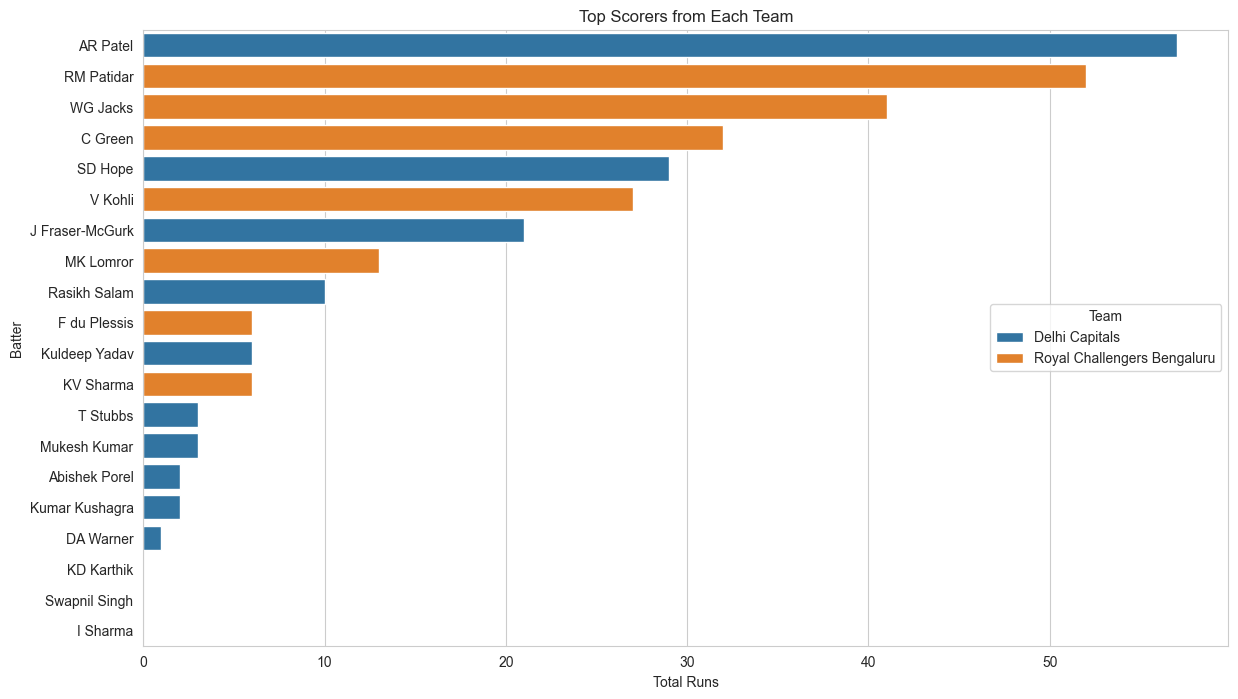

In [5]:
# calculating top scorers for each team
top_scorers = deliveries_df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

Here,

AR Patel from Delhi Capitals emerged as the top scorer of the match, amassing slightly over 50 runs, clearly outshining other players. 

Meanwhile, RM Patidar led the scoring for Royal Challengers Bangalore, coming close to the 50-run mark. 

The bar chart highlights a well-rounded contribution from both teams, with multiple players adding valuable runs to their respective totals.

Bowling analysis, examining which bowlers claimed the most wickets and their corresponding economy rates. This involves calculating the total number of wickets taken by each bowler and the runs they conceded per over bowled. 

To provide a clear and comprehensive visualization of their performance, I'll use a combined bar and line plot. The bar chart will represent the number of wickets, while the line plot will depict their economy rates.

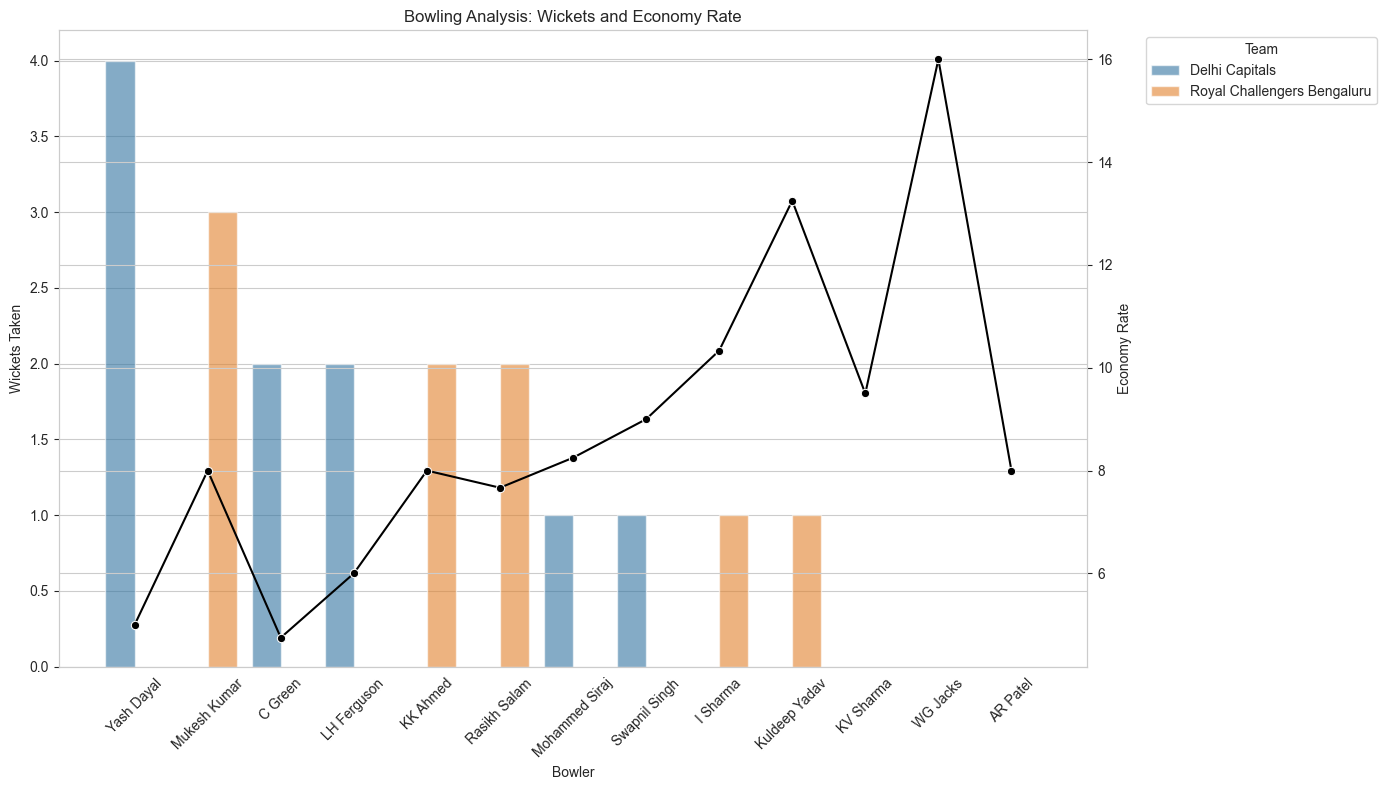

In [6]:
# preparing data for bowling analysis
deliveries_df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

The combined bar and line plot provides a comprehensive overview of the bowling performance of each team:

- Wickets Taken: The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.

- Economy Rate: The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

Now,analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out). This can provide insights into the nature of the pitch and the playing conditions. I’ll visualize this using a pie chart:

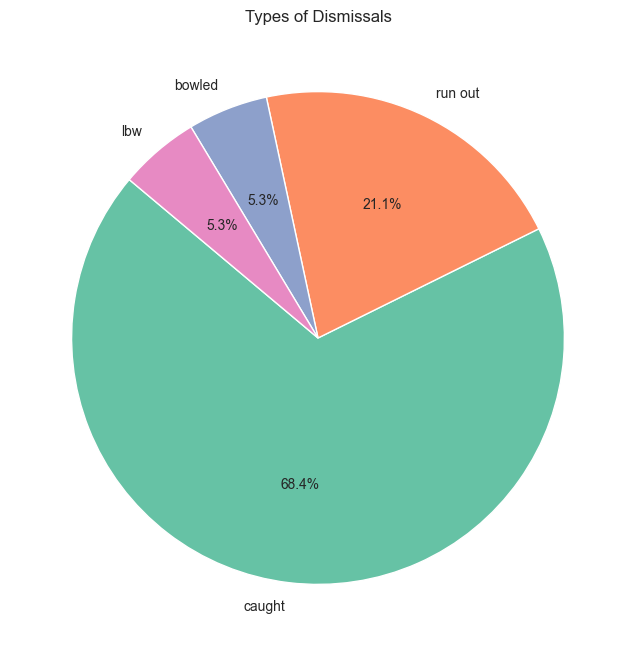

In [7]:
# counting dismissal types
dismissal_types = deliveries_df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match.
I’ll look at runs scored per partnership and how long each partnership lasted in terms of balls faced:

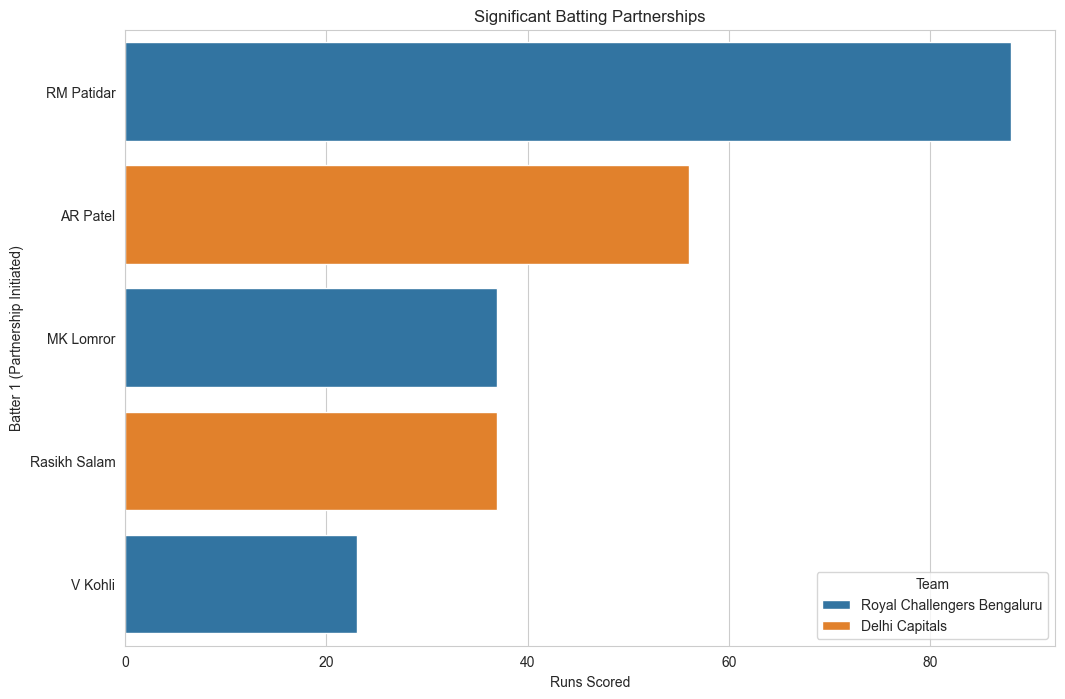

In [8]:
#  function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(deliveries_df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

The bar chart highlights significant batting partnerships from the match, focusing on those that contributed more than 20 runs. These insights enhance our analysis by:

Identifying impactful partnerships: These key collaborations likely played a crucial role in shaping the match’s outcome, showcasing the efficiency of specific batting pairs.
Highlighting player contributions: The chart reveals which players were involved in critical partnerships, aiding in the evaluation of individual form and team strategies.

Next, I’ll delve into a Phase Analysis to assess team performances across different stages of the innings:

Powerplay (Overs 1-6): Examining early scoring rates and wicket loss.
Middle Overs (Overs 7-15): Analyzing consolidation and acceleration phases.
Death Overs (Overs 16-20): Evaluating late-game scoring and pressure handling.
This analysis will provide valuable insights into each team’s tactical approach and adaptability under varying match conditions.

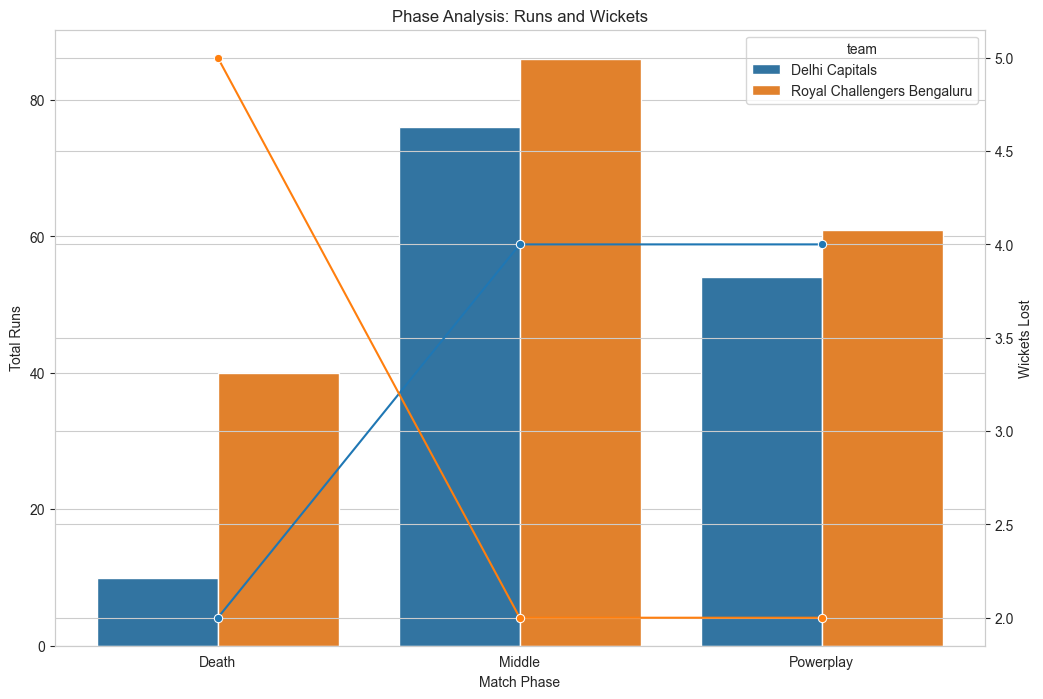

In [9]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
deliveries_df['phase'] = deliveries_df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = deliveries_df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

The plot above provides a clear breakdown of the match into different phases; Powerplay, Middle, and Death, and illustrates how each team performed during these segments:

- Powerplay: Both teams have a relatively low total of runs, with RCB losing more wickets than DC in this phase, as indicated by the height of the orange line.
- Middle: This phase shows the highest run-scoring for both teams, with DC scoring slightly more than RCB. The wickets lost remain controlled, suggesting stable innings from both teams.
- Death: RCB has a sharp decrease in runs compared to the Middle phase, while DC maintains a high run rate. Wickets lost by RCB increased significantly in this phase, marked by the orange line peaking near 4.5, indicating a possible collapse or aggressive batting that did not pay off.

Now, calculate the strike rates for all batters in this match and then analyze the data to see which players were the most effective in terms of scoring quickly. 

After calculating the strike rates, we can look at correlations with other variables such as runs scored or the phase of play during which the runs were scored. 

This can give us insights into which players accelerate scoring at crucial times or against specific bowlers. First, I’ll calculate the strike rate for each batter:

In [10]:
# calculate runs and balls faced for each batter
batter_stats = deliveries_df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


Here are the top performers in terms of strike rate from the match:

- J Fraser-McGurk had the highest strike rate at 262.50, scoring 21 runs from just 8 balls.

- Virat Kohli also scored efficiently, with a strike rate of 192.86, making 27 runs from 14 balls.

- Rajat Patidar contributed significantly with a strike rate of 152.94, accumulating 52 runs from 34 balls.

looking at how the strike rate varied with the phase of the game for these top performers. It could give insights into strategic scoring and game dynamics during different innings stages:

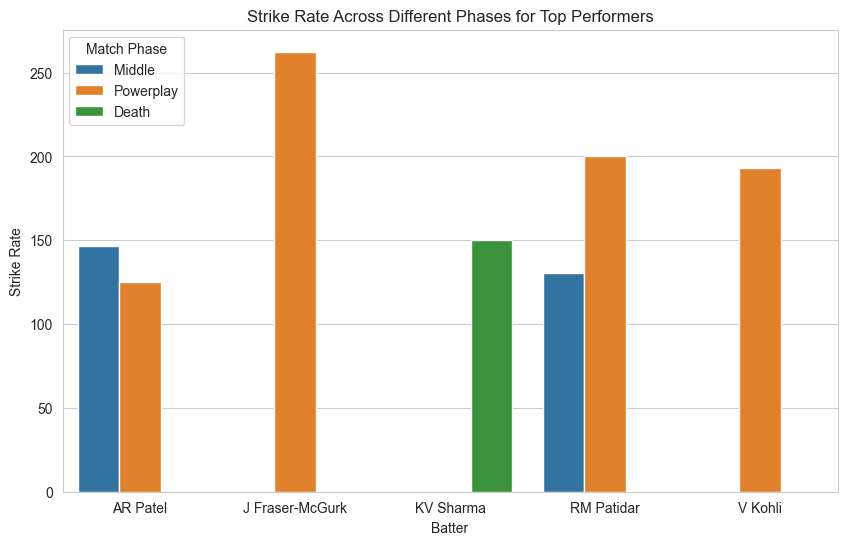

In [11]:
# merging phase information with batter stats
batter_phase_stats = deliveries_df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

- J Fraser-McGurk stands out with a particularly high strike rate in the Middle phase, significantly higher than any other phase or player, suggesting a highly aggressive and effective batting performance during this part of the innings.

- V Kohli and RM Patidar both have high strike rates in the Death phase, indicating their ability to accelerate scoring towards the end of the innings, which is crucial for setting or chasing targets.

- AR Patel shows consistency in the Powerplay and Middle phases with a slightly reduced but still competitive strike rate, indicating his role as a steady opener or middle-order batter.

- KV Sharma exhibits a lower strike rate in the Middle phase compared to others, suggesting a more conservative approach during this phase or difficulty in accelerating.

the run rate for each over for both teams and see how the run rates changed throughout the innings, particularly focusing on the overs where wickets fell:

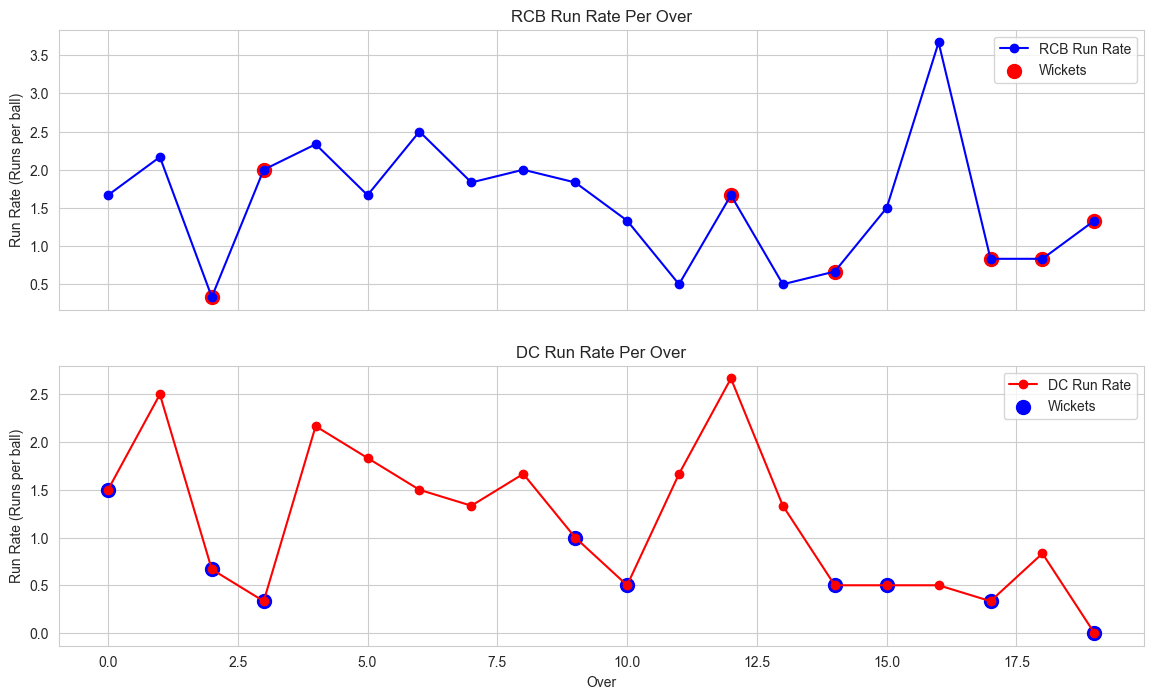

In [12]:
# calculate runs and wickets per over for both teams
per_over_stats = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)    # Runs per over to runs per ball (standard rate)

# separate data for RCB and DC for plotting
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# RCB
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

# DC
ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()

The plotted run rates for each over, combined with wicket markers (depicted as large dots), reveal valuable insights into the match's progression:

- RCB Run Rate Fluctuations:
RCB's run rate exhibits noticeable fluctuations, peaking at approximately 3.5 runs per ball towards the end of their innings. Wicket markers (red circles) align with overs where the run rate dips, reflecting the common trend of wickets disrupting batting momentum.

- DC Run Rate Patterns:
DC’s run rate begins strongly but declines sharply after the initial overs. It stabilizes during the middle phase before experiencing another peak followed by a drop toward the innings' end. Wicket markers (blue circles) correspond to overs with lower run rates, highlighting effective RCB bowling during critical moments.

This analysis underscores the dynamic interplay between run-scoring and wicket-taking, showcasing how these elements shaped the course of the game.